<h3> This database contains 14 physical attributes based on physical testing of a patient. </h3>

 Blood samples are taken and the patient also conducts a brief exercise test. 
 The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). 

-  Attribute Information:
  * age
  * sex
  * chest pain type (4 values)
  * resting blood pressure
  * serum cholestoral in mg/dl
  * fasting blood sugar > 120 mg/dl
  * resting electrocardiographic results (values 0,1,2)
  * maximum heart rate achieved
  * exercise induced angina
  * oldpeak = ST depression induced by exercise relative to rest
  * the slope of the peak exercise ST segment
  * number of major vessels (0-3) colored by flourosopy
  * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
  * target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

 Creators:
 Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
 University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
 University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
 V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv('./Datasets/heart.csv')


In [2]:
print(data.info())
print(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
46    44    1   2       140   235    0        0      180      0      0.0   
255   45    1   0       142   309    0        0      147      

- checking if dataset has any feature value missing

In [3]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


- Visualization on data

<Axes: xlabel='target', ylabel='count'>

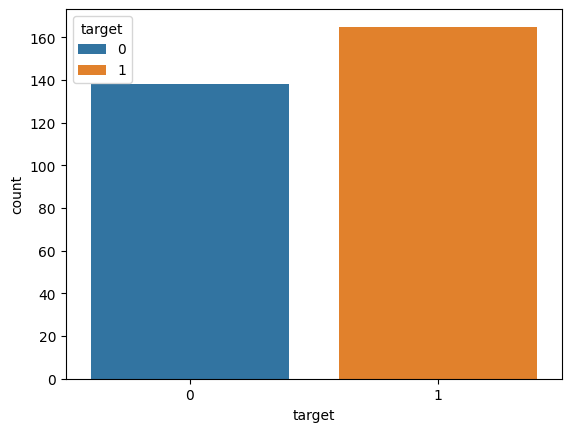

In [4]:
# Count per category
sns.countplot(x='target' , data=data , hue='target')

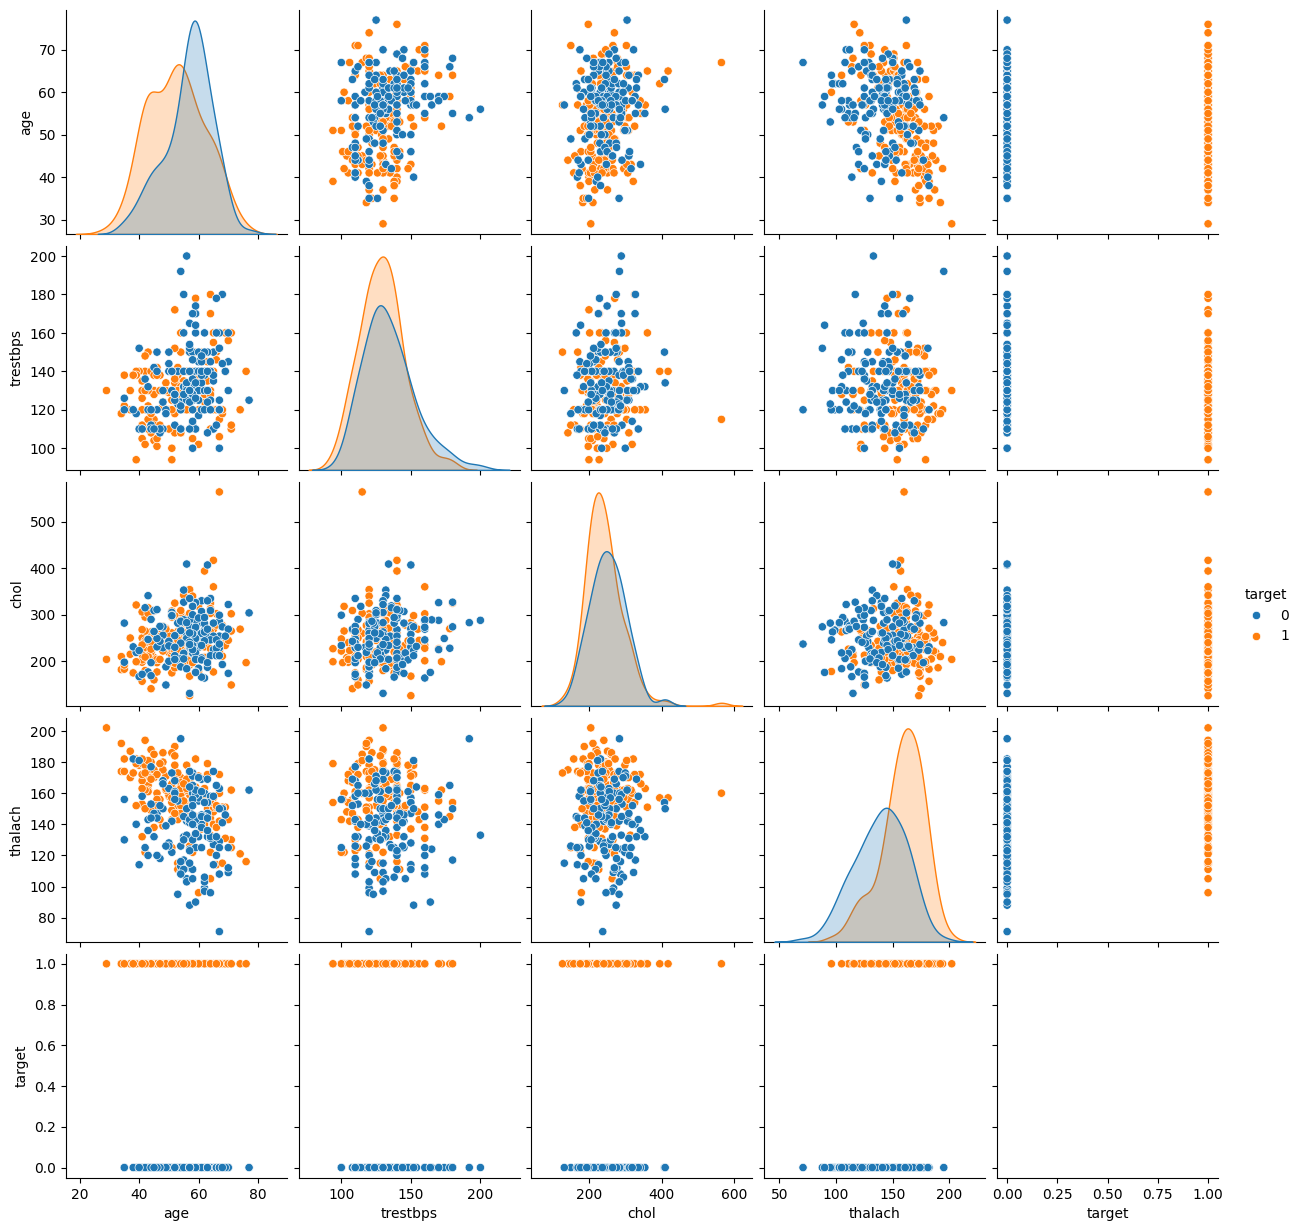

In [5]:
# Pair plot on ['age','trestbps', 'chol','thalach','target']
sns.pairplot(data=data , vars=['age','trestbps', 'chol','thalach','target'] , hue='target')

<Axes: >

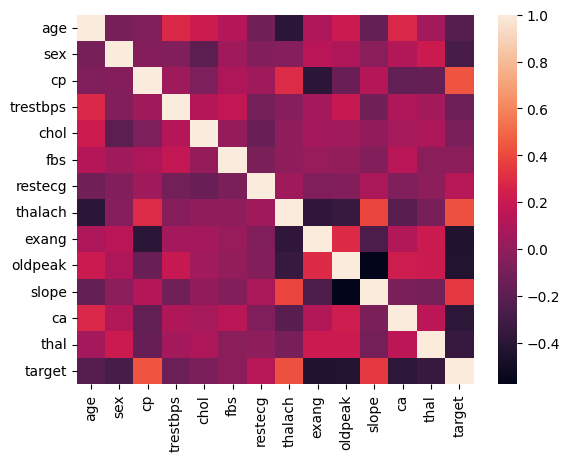

In [11]:
sns.heatmap(data=data.corr())

- Coding the Model

In [7]:
X = data.drop('target' , axis=1)
y = data['target']

In [9]:
import warnings
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

base_model = OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000 , solver='saga'))

# supressing the warings , as the 'l1_ratio' is only used when penalty is 'elastic'.
warnings.filterwarnings("ignore", message="l1_ratio parameter is only used when penalty is 'elasticnet'")

params_grid = {
    'estimator__penalty': ['l1' ,'l2' , 'elasticnet'],
    'estimator__l1_ratio': np.linspace(0, 1, 20),
    'estimator__C': np.linspace(0.01, 2, 20)  
}

MODEL = GridSearchCV(estimator=base_model , param_grid=params_grid , cv=5 , )
MODEL.fit(X_train , y_train)

# Best params
print(MODEL.best_params_)

{'estimator__C': np.float64(0.11473684210526315), 'estimator__l1_ratio': np.float64(0.0), 'estimator__penalty': 'l2'}


- Predictions on Test set

In [10]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = MODEL.predict(X_test)

print(confusion_matrix(y_test , y_pred)) # all-over 16 wrong predictions...
print(classification_report(y_test , y_pred))

[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

